In [1]:
# %% libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# %% read data
wd = os.getcwd()
fdr = 'data/killerAppData'
in_f = 'data.csv'
df = pd.read_csv(os.path.join(wd, fdr, in_f))

In [6]:
df.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cohort32,cohort33,cohort34,cohort35,cohort36,cohort37,cohort38,noupdates,avdeltatime,lnnumcomapp
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,4.418840
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1.609438
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,3.555348
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,1.386294
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,2.772589


In [15]:
# %% get a preview of daa
gr = df.groupby(['cat', 'killerappgros'])   # find the killerappgros for each category cat
df_counts = gr.size().reset_index(name='counts')   # get the total num of killerappgros in each cat
df_counts.head()

,cat,killerappgros,counts
0,1,0,1572
1,1,1,24
2,2,0,3777
3,2,1,69
4,3,0,4752


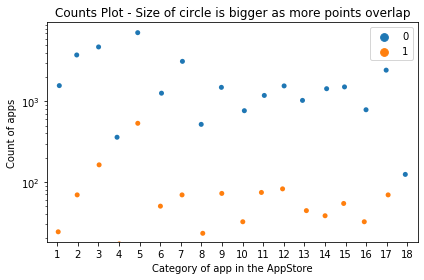

In [17]:
# %% stripplot

# create figure
fig = plt.figure(figsize=(6, 4))

# create plot
ax = fig.add_subplot(1, 1, 1)

# stripplot
sns.stripplot(x=df_counts['cat'],
              y=df_counts['counts'],
              hue=df_counts['killerappgros'],   # Nest the strips within a categorical variable: killerapp or not = label
              data=df_counts, ax=ax)

# axes
ax.set_xlabel('Category of app in the AppStore')
ax.set_yscale('log')
ax.set_ylabel('Count of apps')

# title
plt.title('Counts Plot - Size of circle is bigger as more points overlap')

# legend
ax.legend(loc='best')

# save plot
plt.tight_layout()
plt.savefig('counts_plot.pdf')

# save plot
plt.tight_layout()
#plt.savefig(os.path.join(os.getcwd(), 'count_plot.pdf'))

# show plot
plt.show()